In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

#from bs4 import BeautifulSoup
import os

!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium # map rendering library

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                                          /failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.9|3.6.9|3.6.9|3.6.9|>=3.6,<3.7.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|>=3.7,<3.8.0a0|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|3.4.*',build='3_73_pypy|2_73_pypy|1_73_pypy|0_73_pypy']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.7

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the rig

jupyterlab -> notebook[version='>=4.2|>=4.3|>=4.3.1']
ipywidgets -> notebook
jupyterlab_server -> notebook[version='>=4.2.0']
ibm-wsrt-py37main-main -> notebook==6.0.3[build=*]
arcgis=1.6.0 -> notebook

Package matplotlib conflicts for:
scikit-image -> matplotlib[version='>=1.1|>=1.3.1|>=2.0.0']
ibm-wsrt-py37main-main -> matplotlib==3.2.2[build=*]
nltk -> matplotlib
bokeh -> matplotlib
arcgis=1.6.0 -> matplotlib
seaborn -> matplotlib[version='>=1.4.3|>=2.1.2']

Package pcre conflicts for:
ibm-wsrt-py37main-main -> pcre==8.44[build=*]
gstreamer -> pcre[version='>=8.41,<9.0a0|>=8.43,<9.0a0|>=8.42,<9.0a0']
glib -> pcre[version='>=8.41,<9.0a0|>=8.43,<9.0a0|>=8.44,<9.0a0|>=8.42,<9.0a0']

Package cycler conflicts for:
matplotlib-base -> cycler[version='>=0.10']
matplotlib -> cycler[version='>=0.10']
ibm-wsrt-py37main-main -> cycler==0.10.0[build=*]

Package blosc conflicts for:
pytables -> blosc[version='>=1.14.3,<2.0a0|>=1.14.4,<2.0a0|>=1.15.0,<2.0a0|>=1.16.3,<2.0a0|>=1.17.0,<2.0a0|>=1.18.1

In [2]:
CLIENT_ID = 'PYKVZDWQURA10EN124CG1YVBZ43SBP0QLYYATEB4CPRW3F2B' # your Foursquare ID
CLIENT_SECRET = 'AGORHWWWHESZ54XRV5CGQIM5K5T3JKIQHKI4KY3FFEUJZDFR' # your Foursquare Secret
VERSION = '20201030' # Foursquare API version

In [3]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

We use the code to obtain the boroughs and neighborhoods of NYC

In [4]:
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


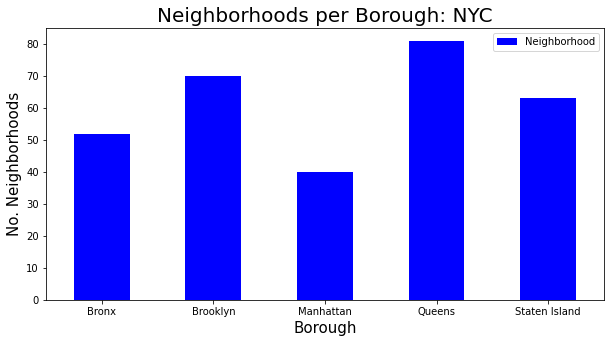

In [38]:
clr = "blue"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

Now I prepare to filter out boroughs and neighborhoods with Mexican restaurants

In [6]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
mexican_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    mexican_restaurants=venues[venues['Category']=='Mexican Restaurant']   
    print('(',count,'/',len(ny_data),')','Mexican Restaurants in '+Neighborhood+', '+Borough+':'+str(len(mexican_restaurants)))
    print(row)
    for resturant_detail in mexican_restaurants.values.tolist():
        id, name , category=resturant_detail
        mexican_rest_ny = mexican_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Mexican Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Mexican Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Mexican Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Mexican Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Mexican Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Mexican Restaurants in Kingsbridge, Bronx:3
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Mexican Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Mexican Restaurants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Mexican Restaurants in Norwood, Bronx:0
['

( 68 / 306 ) Mexican Restaurants in Red Hook, Brooklyn:0
['Brooklyn', 'Red Hook', 40.676253230250886, -74.0127589747356]
( 69 / 306 ) Mexican Restaurants in Gowanus, Brooklyn:0
['Brooklyn', 'Gowanus', 40.673931143187154, -73.99444087145339]
( 70 / 306 ) Mexican Restaurants in Fort Greene, Brooklyn:0
['Brooklyn', 'Fort Greene', 40.68852726018977, -73.97290574369092]
( 71 / 306 ) Mexican Restaurants in Park Slope, Brooklyn:2
['Brooklyn', 'Park Slope', 40.67232052268197, -73.97705030183924]
( 72 / 306 ) Mexican Restaurants in Cypress Hills, Brooklyn:0
['Brooklyn', 'Cypress Hills', 40.68239101144211, -73.87661596457296]
( 73 / 306 ) Mexican Restaurants in East New York, Brooklyn:0
['Brooklyn', 'East New York', 40.669925700847045, -73.88069863917366]
( 74 / 306 ) Mexican Restaurants in Starrett City, Brooklyn:0
['Brooklyn', 'Starrett City', 40.64758905230874, -73.87936970045875]
( 75 / 306 ) Mexican Restaurants in Canarsie, Brooklyn:0
['Brooklyn', 'Canarsie', 40.63556432797428, -73.90209269

( 131 / 306 ) Mexican Restaurants in Woodside, Queens:0
['Queens', 'Woodside', 40.74634908860222, -73.90184166838284]
( 132 / 306 ) Mexican Restaurants in Jackson Heights, Queens:0
['Queens', 'Jackson Heights', 40.75198138007367, -73.88282109164365]
( 133 / 306 ) Mexican Restaurants in Elmhurst, Queens:1
['Queens', 'Elmhurst', 40.744048505122024, -73.88165622288388]
( 134 / 306 ) Mexican Restaurants in Howard Beach, Queens:1
['Queens', 'Howard Beach', 40.65422527738487, -73.8381376460028]
( 135 / 306 ) Mexican Restaurants in Corona, Queens:2
['Queens', 'Corona', 40.74238175015667, -73.85682497345258]
( 136 / 306 ) Mexican Restaurants in Forest Hills, Queens:0
['Queens', 'Forest Hills', 40.72526378216503, -73.84447500788983]
( 137 / 306 ) Mexican Restaurants in Kew Gardens, Queens:0
['Queens', 'Kew Gardens', 40.7051790354148, -73.82981905825703]
( 138 / 306 ) Mexican Restaurants in Richmond Hill, Queens:0
['Queens', 'Richmond Hill', 40.69794731471763, -73.83183321446887]
( 139 / 306 ) M

( 198 / 306 ) Mexican Restaurants in St. George, Staten Island:0
['Staten Island', 'St. George', 40.6449815710044, -74.07935312512797]
( 199 / 306 ) Mexican Restaurants in New Brighton, Staten Island:0
['Staten Island', 'New Brighton', 40.64061455913511, -74.08701650516625]
( 200 / 306 ) Mexican Restaurants in Stapleton, Staten Island:1
['Staten Island', 'Stapleton', 40.62692762538176, -74.07790192660066]
( 201 / 306 ) Mexican Restaurants in Rosebank, Staten Island:3
['Staten Island', 'Rosebank', 40.61530494652761, -74.06980526716141]
( 202 / 306 ) Mexican Restaurants in West Brighton, Staten Island:1
['Staten Island', 'West Brighton', 40.63187892654607, -74.1071817826561]
( 203 / 306 ) Mexican Restaurants in Grymes Hill, Staten Island:0
['Staten Island', 'Grymes Hill', 40.624184791313006, -74.08724819983729]
( 204 / 306 ) Mexican Restaurants in Todt Hill, Staten Island:0
['Staten Island', 'Todt Hill', 40.59706851814673, -74.1113288180088]
( 205 / 306 ) Mexican Restaurants in South Bea

( 259 / 306 ) Mexican Restaurants in Elm Park, Staten Island:0
['Staten Island', 'Elm Park', 40.630146741193826, -74.1418167896889]
( 260 / 306 ) Mexican Restaurants in Remsen Village, Brooklyn:0
['Brooklyn', 'Remsen Village', 40.652117451793494, -73.91665331978048]
( 261 / 306 ) Mexican Restaurants in New Lots, Brooklyn:0
['Brooklyn', 'New Lots', 40.6627442796966, -73.88511776379292]
( 262 / 306 ) Mexican Restaurants in Paerdegat Basin, Brooklyn:0
['Brooklyn', 'Paerdegat Basin', 40.63131755039667, -73.90233474295836]
( 263 / 306 ) Mexican Restaurants in Mill Basin, Brooklyn:0
['Brooklyn', 'Mill Basin', 40.61597423962336, -73.91515391550404]
( 264 / 306 ) Mexican Restaurants in Jamaica Hills, Queens:0
['Queens', 'Jamaica Hills', 40.71145964370482, -73.79646462081593]
( 265 / 306 ) Mexican Restaurants in Utopia, Queens:0
['Queens', 'Utopia', 40.73350025429757, -73.79671678028349]
( 266 / 306 ) Mexican Restaurants in Pomonok, Queens:0
['Queens', 'Pomonok', 40.73493618075478, -73.80486120

In [7]:
mexican_rest_ny.to_csv('mexican_rest_ny_tocsv1.csv')

In [8]:
mexican_ny = pd.read_csv('mexican_rest_ny_tocsv1.csv')
mexican_rest_ny.tail()

,Borough,Neighborhood,ID,Name
131,Brooklyn,Homecrest,507e08fae4b0998ce3421276,El Mexicano Restaurante & Cafe Inc
132,Brooklyn,Homecrest,4a3ada26f964a5205fa01fe3,La Villita Mexican Restaurant
133,Bronx,Kingsbridge Heights,4b403740f964a520e8b625e3,Montezuma Mexican Restaurant
134,Bronx,Kingsbridge Heights,4e4c9e1318388d49816b44d8,La Catrina
135,Bronx,Kingsbridge Heights,512bb489e4b092e603529c5b,Mirador Restaurant


In [9]:
mexican_rest_ny.shape

(136, 4)

    There are a total of 136 Mexican restaurants in NYC

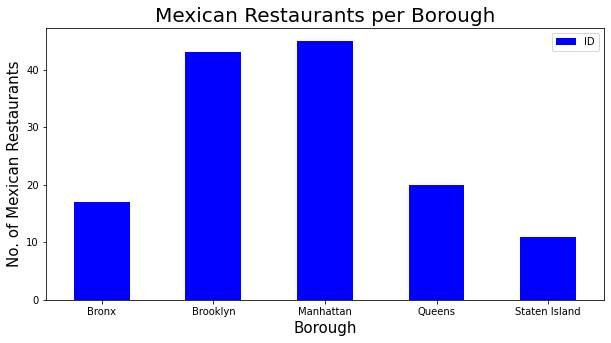

In [39]:
mexican_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Mexican Restaurants per Borough', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of Mexican Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

Staten Island has the least amount of Mexican Restaurants

In [34]:
mexican_rest_ny[mexican_rest_ny['Borough']=='Staten Island']

,Borough,Neighborhood,ID,Name
105,Staten Island,Stapleton,53ba2986498efc27ecf908d4,El Patron Restaurant & Lounge Inc.
106,Staten Island,Rosebank,548a376f498ed35b87006f24,Maizal
107,Staten Island,Rosebank,4b63743df964a520117b2ae3,Yummy Taco
108,Staten Island,Rosebank,54d69da4498ee4139d7e4983,Mazial
109,Staten Island,West Brighton,4be60a50bcef2d7fa3bb04e5,Burrito Bar
110,Staten Island,New Springville,4f8f480ce4b06b50aec5da08,QDOBA Mexican Eats
111,Staten Island,New Dorp,4f5d5bb5e4b035e31551ddc9,Cantina Mexicana
112,Staten Island,Woodrow,58ca4ef615fb435cb5b8b9d0,QDOBA Mexican Eats
113,Staten Island,Tompkinsville,4bbfd2712a89ef3b82afef88,Taqueria El Gallo Azteca
120,Staten Island,Clifton,548a376f498ed35b87006f24,Maizal


In [40]:
mexican_rest_ny[mexican_rest_ny['Borough']=='Staten Island'].shape

(11, 4)

From observing the chart, it appears Staten Island has 8 neighborhoods with Mexican restaurants

In [37]:
ny_data.groupby('Borough')['Neighborhood'].count()

Borough
Bronx            52
Brooklyn         70
Manhattan        40
Queens           81
Staten Island    63
Name: Neighborhood, dtype: int64

Since Staten Island holds the 3rd most neighborhoods in all of NYC, 63 to be exact, it would be ideal to open a Mexican restaurant in this borough since they are only open in 8 neighborhoods. 